# System Use and Monitoring

The Ancient Greek philosopher, Heraclitus believed that all things are in a constant state of change or *flux*—a doctrine made famous by the following statement:

```{epigraph}
You cannot step twice into the same rivers; for fresh waters are ever flowing in upon you.

-- Heraclitus, [Fragment 12](https://en.wikisource.org/wiki/Fragments_of_Heraclitus)
```

Metaphysics aside, it is certainly true that our world is dynamic and that many things change over time.
As a result of this, and depending on the context of deployment, the performance of a model that aims to predict, classify, or recommend, is likely to degrade as the populations or objects it represents change or evolve.
This process of *model drift* can be said to occur when there is increasing variation between how representative the training dataset was at the time of development and how representative it is at later stages.

There are many context- and domain-specific causes of model drift.
However, we can consider two main types.

On the one hand, drift can occur when the statistical properties of an input variable change (i.e. there is a shift in the underlying data distribution). For example, perhaps house prices start increasing and a model becomes more and more inaccurate at predicting them.[^selection] 

The following offers a graphical representation of this problem, with a distributional shift between two different points in time (T=1, T=2).

[^selection]: Sometimes this type of drift may not be because of any underlying change in the properties of the relevant variable, but because of issues with the original data collection in the first place (e.g. selection bias).

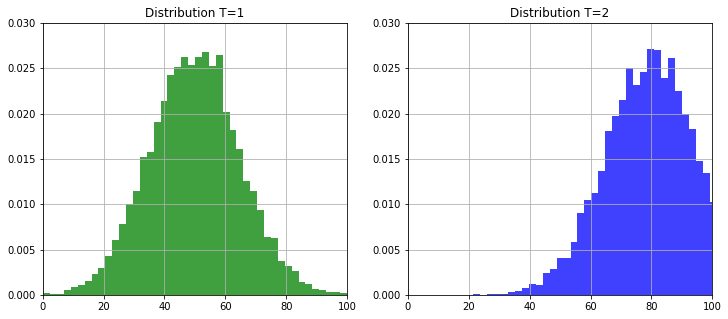

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# setting values for x
mu1, mu2, sigma = 50,80, 15
x1 = mu1+sigma*np.random.randn(10000)
x2 = mu2+sigma*np.random.randn(10000)
fig, axes = plt.subplots(1,2,figsize=(12,5))

# distibution t=1
n, bins, patches = axes[0].hist(x1, 50, density=True, facecolor='g', alpha=0.75)
axes[0].set_title('Distribution T=1')
axes[0].set_xlim(0, 100)
axes[0].set_ylim(0, 0.03)
axes[0].grid(True)

# distribution t=2
n, bins, patches = axes[1].hist(x2, 50, density=True, facecolor='b', alpha=0.75)
axes[1].set_title('Distribution T=2')
axes[1].set_xlim(0, 100)
axes[1].set_ylim(0, 0.03)
axes[1].grid(True)
plt.show()

On the other hand, there could be a more nuanced reason related to the conceptual or social meaning of the input variables. 
An example of this could be a machine learning algorithm used in finance that aims to predict whether someone is likely to default on a loan using variables with social meaning, such as `occupation`.
If the model detects a relationship between specific values for `occupation` and the employee's ability to pay back a loan in a timely manner, the system may recommend more loans to people in this occupation. 
However, if something happens that has a global impact on these jobs (e.g. increased investment in the sector creating a rise in average wages), this association will change. 
The result is that people who could otherwise afford a loan may still be denied one due to inaccurate models.

These two examples are an important reason why ongoing monitoring of a system is so important. 
How model drift is handled, however, is dealt with in the next section.